<a href="https://colab.research.google.com/github/anandPILLAI04/sms_spam_detection/blob/main/Micro_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# --- Load Dataset ---
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]  # Rename for clarity
df.columns = ['label', 'message']

# --- Preprocessing Function ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

# --- Apply Cleaning ---
df['clean_text'] = df['message'].apply(clean_text)

# --- Define Features and Labels ---
X = df['clean_text']
y = df['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    print(f'\nModel: {model.__class__.__name__}')
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

# --- Train and Evaluate Models ---
classify(LogisticRegression(), X, y)
classify(MultinomialNB(), X, y)
classify(SVC(C=3), X, y)
classify(RandomForestClassifier(), X, y)


Model: LogisticRegression
Accuracy: 96.8413496051687
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1206
        spam       0.99      0.77      0.87       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393


Model: MultinomialNB
Accuracy: 96.69777458722182
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.75      0.86       187

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.96      1393


Model: SVC
Accuracy: 98.27709978463747
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       1.00      0.87      0.93       187

    accuracy                          

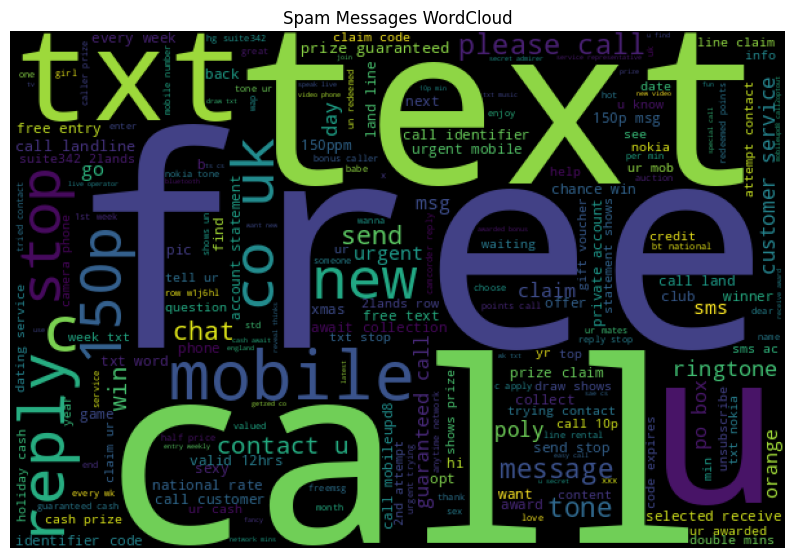

In [7]:
# 1. WordCloud for Spam
spam_words = ' '.join(df[df['label']=='spam']['clean_text'])
spam_wc = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam Messages WordCloud')
plt.show()

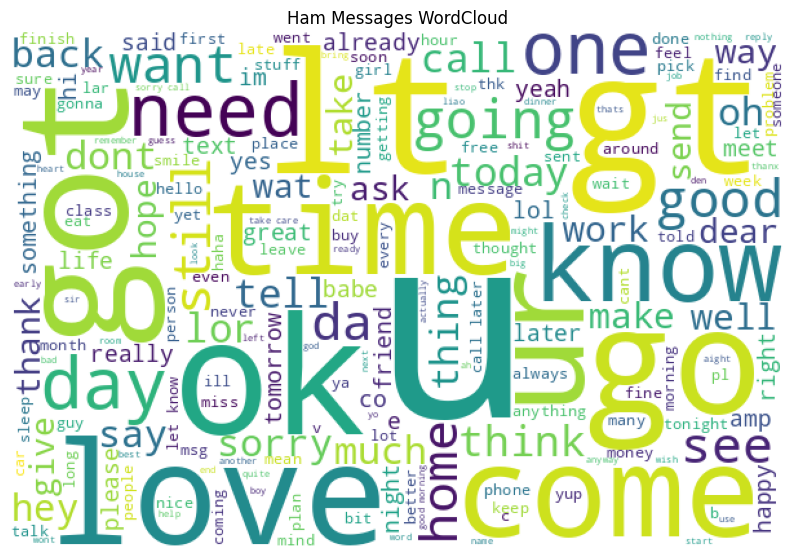

In [8]:
# 2. WordCloud for Ham
ham_words = ' '.join(df[df['label']=='ham']['clean_text'])
ham_wc = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Ham Messages WordCloud')
plt.show()


<ipython-input-9-7e388ec9c03d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


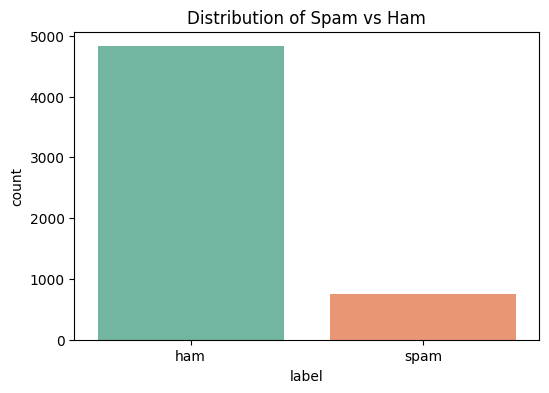

In [9]:
# 3. Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Spam vs Ham')
plt.show()


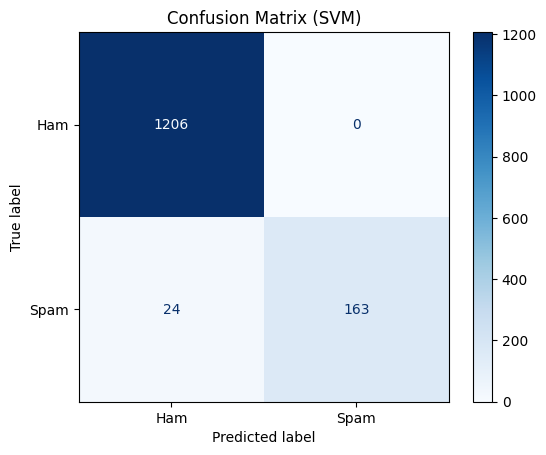

In [10]:
# 4. Confusion Matrix for SVM
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
pipeline_model = Pipeline([('vect', CountVectorizer()),
                           ('tfidf', TfidfTransformer()),
                           ('clf', SVC(C=3))])
pipeline_model.fit(x_train, y_train)
y_pred = pipeline_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.show()


In [16]:
logistic_model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
])
logistic_model.fit(x_train, y_train)

nb_model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])
nb_model.fit(x_train, y_train)

svc_model = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(C=3))
])
svc_model.fit(x_train, y_train)

# Demo input
print("\n--- Message Classification Demo ---")
user_input = input("Enter a message to classify :")
cleaned_input = clean_text(user_input)

# Predict using each model
logistic_pred = logistic_model.predict([cleaned_input])[0]
nb_pred = nb_model.predict([cleaned_input])[0]
svc_pred = svc_model.predict([cleaned_input])[0]

print("\nPredictions:")
print(f"Logistic Regression: {logistic_pred}")
print(f"Naive Bayes:         {nb_pred}")
print(f"SVM:                 {svc_pred}")



--- Message Classification Demo ---
Enter a message to classify :Congratulations! You have been selected as the winner of a brand-new iPhone 15 Pro. To claim your reward, simply visit our website within the next 24 hours and enter the code WINBIG2025. This offer is available exclusively for lucky subscribers like you. Don't

Predictions:
Logistic Regression: ham
Naive Bayes:         spam
SVM:                 spam
